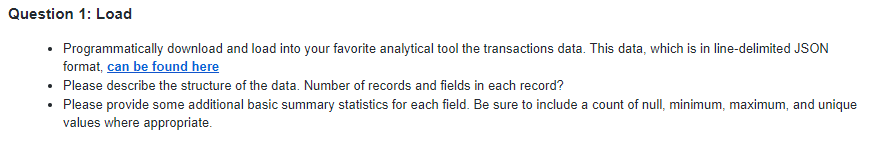

In [11]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
pd.options.display.max_rows = 10

In [12]:
data = pd.read_json('transactions.txt',lines=True)

In [13]:
data.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.0,,,,True,,,False,False


In [14]:
print("Number of rows in data are : ",len(data),' and number of columns are ',len(data.columns))

Number of rows in data are :  786363  and number of columns are  29


In [15]:
data['transactionDateTime'] = pd.to_datetime(data['transactionDateTime'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             786363 non-null  int64         
 1   customerId                786363 non-null  int64         
 2   creditLimit               786363 non-null  int64         
 3   availableMoney            786363 non-null  float64       
 4   transactionDateTime       786363 non-null  datetime64[ns]
 5   transactionAmount         786363 non-null  float64       
 6   merchantName              786363 non-null  object        
 7   acqCountry                786363 non-null  object        
 8   merchantCountryCode       786363 non-null  object        
 9   posEntryMode              786363 non-null  object        
 10  posConditionCode          786363 non-null  object        
 11  merchantCategoryCode      786363 non-null  object        
 12  cu

In [16]:
data.replace('',np.nan,inplace=True)

In [17]:
print(data.isnull().sum())

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
                             ...  
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud                          0
Length: 29, dtype: int64


In [18]:
data.drop(['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip','posOnPremises','recurringAuthInd'],axis=1,inplace=True)

In [19]:
data['col'] = np.where(data['accountNumber']==data['customerId'],'equal','not equal')
data['col'].value_counts().to_frame()

,col
equal,786363


In [20]:
data.drop(['accountNumber', 'col'],axis=1,inplace=True)

In [31]:
stat_results = data.describe(datetime_is_numeric=True)
stat_results

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,7.863630e+05,786363.000000,786363.000000,786363,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000
mean,5.372326e+08,10759.464459,6250.725369,2016-07-06 01:58:58.395681536,136.985791,544.467338,544.183857,4757.417799,4508.739089
min,1.000881e+08,250.000000,-1005.630000,2016-01-01 00:01:02,0.000000,100.000000,0.000000,0.000000,0.000000
25%,3.301333e+08,5000.000000,1077.420000,2016-04-06 19:35:07,33.650000,310.000000,310.000000,2178.000000,689.910000
50%,5.074561e+08,7500.000000,3184.860000,2016-07-08 05:03:57,87.900000,535.000000,535.000000,4733.000000,2451.760000
75%,7.676200e+08,15000.000000,7500.000000,2016-10-05 13:52:03.500000,191.480000,785.000000,785.000000,7338.000000,5291.095000
max,9.993896e+08,50000.000000,50000.000000,2016-12-30 23:59:45,2011.540000,998.000000,998.000000,9998.000000,47498.810000
std,2.554211e+08,11636.174890,8880.783989,NaN,147.725569,261.524220,261.551254,2996.583810,6457.442068


In [54]:
categorial_cols = [x for x in data.columns if x not in stat_results.columns]
categorial_cols,len(categorial_cols)

(['merchantName',
  'acqCountry',
  'merchantCountryCode',
  'posEntryMode',
  'posConditionCode',
  'merchantCategoryCode',
  'currentExpDate',
  'accountOpenDate',
  'dateOfLastAddressChange',
  'transactionType',
  'cardPresent',
  'expirationDateKeyInMatch',
  'isFraud'],
 13)

In [69]:
data[categorial_cols[0]].value_counts().to_frame().head(10)

,merchantName
Uber,25613
Lyft,25523
oldnavy.com,16992
staples.com,16980
alibaba.com,16959
apple.com,16898
walmart.com,16873
cheapfast.com,16858
ebay.com,16842
target.com,16813


In [71]:
data[categorial_cols[1]].value_counts().to_frame().head(10)

,acqCountry
US,774709
MEX,3130
CAN,2424
PR,1538


In [72]:
data[categorial_cols[2]].value_counts().to_frame().head(10)

,merchantCountryCode
US,778511
MEX,3143
CAN,2426
PR,1559


In [73]:
data[categorial_cols[3]].value_counts().to_frame().head(10)

,posEntryMode
05,315035
09,236481
02,195934
90,19576
80,15283


In [74]:
data[categorial_cols[4]].value_counts().to_frame().head(10)

,posConditionCode
01,628787
08,149634
99,7533


In [75]:
data[categorial_cols[5]].value_counts().to_frame().head(10)

,merchantCategoryCode
online_retail,202156
fastfood,112138
entertainment,80098
food,75490
online_gifts,66238
rideshare,51136
hotels,34097
fuel,23910
subscriptions,22901
auto,21651


In [79]:
data[categorial_cols[9]].value_counts().to_frame().head(10)

,transactionType
PURCHASE,745193
REVERSAL,20303
ADDRESS_VERIFICATION,20169


In [80]:
data[categorial_cols[10]].value_counts().to_frame().head(10)

,cardPresent
False,433495
True,352868


In [81]:
data[categorial_cols[11]].value_counts().to_frame().head(10)

,expirationDateKeyInMatch
False,785320
True,1043


In [82]:
data[categorial_cols[12]].value_counts().to_frame().head(10)

,isFraud
False,773946
True,12417


<AxesSubplot:ylabel='isFraud'>

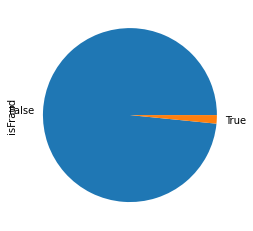

In [85]:
data['isFraud'].value_counts().plot(kind='pie')